In [2]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import nltk

In [21]:
full_df = pd.read_csv('tweets_11-06-2020.csv')

In [22]:
# Preprocessing data
full_df['adjusted_date'] = pd.to_datetime(full_df.date, infer_datetime_format=True, utc = True)
full_df['created_at_est'] = full_df['adjusted_date'].dt.tz_convert('US/Eastern')
full_df['to_period'] = full_df['created_at_est'].dt.to_period("M")

/Users/miki/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1091: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [23]:
full_df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,adjusted_date,created_at_est,to_period
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,2011-08-02 18:07:48+00:00,2011-08-02 14:07:48-04:00,2011-08
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,2020-03-03 01:34:50+00:00,2020-03-02 20:34:50-05:00,2020-03
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,2020-01-17 03:22:47+00:00,2020-01-16 22:22:47-05:00,2020-01
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,2020-09-12 20:10:58+00:00,2020-09-12 16:10:58-04:00,2020-09
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,2020-01-17 13:13:59+00:00,2020-01-17 08:13:59-05:00,2020-01


In [24]:
full_df['source'] = np.where(full_df['device'].isin(['Twitter for iPhone','Twitter for Android','Twitter Web Client','TweetDeck','TwitLonger Beta']),full_df['device'],'Others')

In [25]:
full_df['source'].unique()

array(['TweetDeck', 'Twitter for iPhone', 'Others', 'Twitter for Android',
       'Twitter Web Client', 'TwitLonger Beta'], dtype=object)

In [27]:
source_by_period = full_df.groupby(['source','to_period'])['id'].size().reset_index(name='counts')

android_total = source_by_period[source_by_period['source']=="Twitter for Android"]['counts'].sum()
iphone_total = source_by_period[source_by_period['source']=="Twitter for iPhone"]['counts'].sum()
web_client_total = source_by_period[source_by_period['source']=="Twitter Web Client"]['counts'].sum()
tweetdeck_total = source_by_period[source_by_period['source']=="TweetDeck"]['counts'].sum()
tweetlonger_beta_total = source_by_period[source_by_period['source']=="TwitLonger Beta"]['counts'].sum()
others_total = source_by_period[source_by_period['source']=="Others"]['counts'].sum()


In [28]:
def conditions(x):
    if x == 'Twitter for Android':
        return android_total
    elif x == 'Twitter for iPhone':
        return iphone_total
    elif x == 'Twitter Web Client':
        return web_client_total
    elif x == 'TweetDeck':
        return tweetdeck_total
    elif x == 'TwitLonger Beta':
        return tweetlonger_beta_total
    else:
        return others_total

func = np.vectorize(conditions)
source_total_class = func(source_by_period['source'])
source_by_period["separate_percentage"] = source_by_period['counts']/source_total_class

In [29]:
source_by_period

,source,to_period,counts,separate_percentage
0,Others,2012-10,18,0.018311
1,Others,2012-11,18,0.018311
2,Others,2012-12,9,0.009156
3,Others,2013-01,15,0.015259
4,Others,2013-02,18,0.018311
...,...,...,...,...
333,Twitter for iPhone,2020-07,849,0.032046
334,Twitter for iPhone,2020-08,1128,0.042577
335,Twitter for iPhone,2020-09,1335,0.050391
336,Twitter for iPhone,2020-10,1418,0.053524


In [33]:
source_by_period[source_by_period.source == 'Twitter for Android'].tail()

,source,to_period,counts,separate_percentage
256,Twitter for Android,2016-11,88,0.006050
257,Twitter for Android,2016-12,83,0.005706
258,Twitter for Android,2017-01,146,0.010038
259,Twitter for Android,2017-02,109,0.007494
260,Twitter for Android,2017-03,26,0.001788


In [30]:
def percentage_format(x, pos):
    """
    Args are the value and tick position. 
    Returns number of percentage with one decimal.
    """
    return '{:.0f}{}'.format(x * 100, '%') #old syntax: '%1.0f%' % (x * 100)

<Figure size 432x288 with 0 Axes>

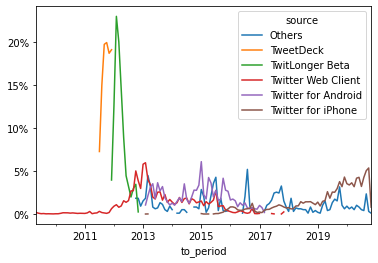

In [41]:
from matplotlib.ticker import FuncFormatter #Call formatter function to format tick values
fig = plt.figure()

source_by_period_pivot = source_by_period.pivot(index = 'to_period', columns = 'source', values = 'separate_percentage')

ax = source_by_period_pivot.plot()
formatter = FuncFormatter(percentage_format)
ax.yaxis.set_major_formatter(formatter)

It was said that Trump switched to iPhone: Trump’s last Android tweet was on March 25th, 2017. 

According to the above graph, there was no more tweets coming from Android anymore after March 2017. It seemed that Trump has truly no longer used Android Phone.

Trump’s staff also confirmed he had switched to use iPhone. https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android

Based on his tweeting style, can we identify who was actually tweeting in his Twitter's account after March 25th, 2017?

In [111]:
df = pd.read_parquet('trump2_dataset2.parquet.gzip')
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,adjusted_date,created_at_est,hour,quoted,tokenized_text,replace_link_tag,link_tag,list_of_words,election_period
index,,,,,,,,,,,,,,,,,
1106,674772697113567233,.@donlemon on @CNN at 10:00 P.M.,f,f,Android,1473,569,2015-12-10 02:08:42,2015-12-10 02:08:42+00:00,2015-12-09 21:08:42-05:00,21,Not Quoted,"[., on, at, 10:00, P, ., M, .]","[., on, at, 10:00, P, ., M, .]",False,[p],before
1120,792176315478609920,Just landed in Iowa - speaking soon!,f,f,Android,19758,5237,2016-10-29 01:28:46,2016-10-29 01:28:46+00:00,2016-10-28 21:28:46-04:00,21,Not Quoted,"[Just, landed, in, Iowa, -, speaking, soon, !]","[Just, landed, in, Iowa, -, speaking, soon, !]",False,"[landed, iowa, speaking, soon]",before
1121,788765196584038400,It is time to #DrainTheSwamp!https://t.co/U2Xe...,f,f,iPhone,14671,7728,2016-10-19 15:34:12,2016-10-19 15:34:12+00:00,2016-10-19 11:34:12-04:00,11,Not Quoted,"[It, is, time, to, #DrainTheSwamp, !, https://...","[It, is, time, to, Link, !, Link]",True,[time],before
1122,786589172911964161,Thank you! #MAGA #AmericaFirst https://t.co/fG...,f,f,iPhone,25660,11527,2016-10-13 15:27:27,2016-10-13 15:27:27+00:00,2016-10-13 11:27:27-04:00,11,Not Quoted,"[Thank, you, !, #MAGA, #AmericaFirst, https://...","[Thank, you, !, Link, Link, Link]",True,[thank],before
1123,777825186758418432,Will be on @foxandfriends at 7:02 A.M. Enjoy.,f,f,Android,9042,1685,2016-09-19 11:02:30,2016-09-19 11:02:30+00:00,2016-09-19 07:02:30-04:00,7,Not Quoted,"[Will, be, on, at, 7:02, A, ., M, ., Enjoy, .]","[Will, be, on, at, 7:02, A, ., M, ., Enjoy, .]",False,[enjoy],before


In [35]:
df[df.created_at_est == min(df.created_at_est)]

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,adjusted_date,created_at_est,hour,quoted,tokenized_text,replace_link_tag,link_tag,list_of_words,election_period
index,,,,,,,,,,,,,,,,,
33521,616823652462542848,"As Governor of Texas, Rick Perry could have do...",f,f,Android,490,192,2015-07-03 04:19:53,2015-07-03 04:19:53+00:00,2015-07-03 00:19:53-04:00,0,Not Quoted,"[As, Governor, of, Texas, ,, Rick, Perry, coul...","[As, Governor, of, Texas, ,, Rick, Perry, coul...",False,"[governor, texas, rick, perry, could, done, fa...",before


In [36]:
df[df.created_at_est == max(df.created_at_est)]

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,adjusted_date,created_at_est,hour,quoted,tokenized_text,replace_link_tag,link_tag,list_of_words,election_period
index,,,,,,,,,,,,,,,,,
43125,892147656319004672,A great day at the White House!,f,f,iPhone,101749,19663,2017-07-31 22:19:11,2017-07-31 22:19:11+00:00,2017-07-31 18:19:11-04:00,18,Not Quoted,"[A, great, day, at, the, White, House, !]","[A, great, day, at, the, White, House, !]",False,"[great, day, white, house]",after


In [112]:
preprocess_df = df[(df['created_at_est'] < '2017-03-26')].copy()

In [113]:
preprocess_df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,adjusted_date,created_at_est,hour,quoted,tokenized_text,replace_link_tag,link_tag,list_of_words,election_period
index,,,,,,,,,,,,,,,,,
1106,674772697113567233,.@donlemon on @CNN at 10:00 P.M.,f,f,Android,1473,569,2015-12-10 02:08:42,2015-12-10 02:08:42+00:00,2015-12-09 21:08:42-05:00,21,Not Quoted,"[., on, at, 10:00, P, ., M, .]","[., on, at, 10:00, P, ., M, .]",False,[p],before
1120,792176315478609920,Just landed in Iowa - speaking soon!,f,f,Android,19758,5237,2016-10-29 01:28:46,2016-10-29 01:28:46+00:00,2016-10-28 21:28:46-04:00,21,Not Quoted,"[Just, landed, in, Iowa, -, speaking, soon, !]","[Just, landed, in, Iowa, -, speaking, soon, !]",False,"[landed, iowa, speaking, soon]",before
1121,788765196584038400,It is time to #DrainTheSwamp!https://t.co/U2Xe...,f,f,iPhone,14671,7728,2016-10-19 15:34:12,2016-10-19 15:34:12+00:00,2016-10-19 11:34:12-04:00,11,Not Quoted,"[It, is, time, to, #DrainTheSwamp, !, https://...","[It, is, time, to, Link, !, Link]",True,[time],before
1122,786589172911964161,Thank you! #MAGA #AmericaFirst https://t.co/fG...,f,f,iPhone,25660,11527,2016-10-13 15:27:27,2016-10-13 15:27:27+00:00,2016-10-13 11:27:27-04:00,11,Not Quoted,"[Thank, you, !, #MAGA, #AmericaFirst, https://...","[Thank, you, !, Link, Link, Link]",True,[thank],before
1123,777825186758418432,Will be on @foxandfriends at 7:02 A.M. Enjoy.,f,f,Android,9042,1685,2016-09-19 11:02:30,2016-09-19 11:02:30+00:00,2016-09-19 07:02:30-04:00,7,Not Quoted,"[Will, be, on, at, 7:02, A, ., M, ., Enjoy, .]","[Will, be, on, at, 7:02, A, ., M, ., Enjoy, .]",False,[enjoy],before


iPhone     2437
Android    2020
Name: device, dtype: int64


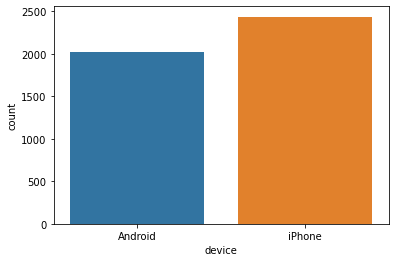

In [53]:
sns.countplot('device',data = preprocess_df)
print(preprocess_df.device.value_counts())

Since we have imbalanced dataset here, I am going to down sampling iPhone data to randomly remove observations from the majority class to prevent its signal from dominating the learning algorithm.

iPhone     2020
Android    2020
Name: device, dtype: int64


<AxesSubplot:xlabel='device', ylabel='count'>

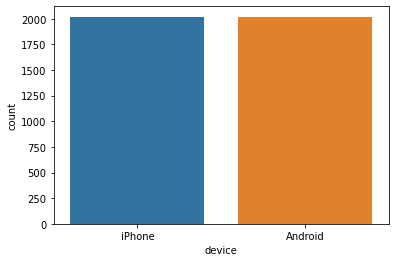

In [56]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = preprocess_df[preprocess_df.device == "iPhone"]
df_minority = preprocess_df[preprocess_df.device == "Android"]

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2020,     # to match minority class
                                 random_state=49) # reproducible results
 
# Combine minority class with downsampled majority class
resample_df = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
print(resample_df.device.value_counts())
sns.countplot('device',data = resample_df)

In [61]:
resample_df['new_text'] = resample_df.replace_link_tag.apply(lambda x: ' '.join(x))

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split

X = resample_df['new_text']
y = resample_df['device']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3232,) (3232,) (808,) (808,)


In [71]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', 'rt', 'amp', 'realdonaldtrump', '/', '://', '_', 'co', 'trump', 'donald', 'makeamericagreatagain','would','u'])

In [78]:
text_clf = Pipeline([('vect', TfidfVectorizer(lowercase=True, stop_words = stop_words)),
                     ('clf', svm.LinearSVC())
                    ])
text_clf = text_clf.fit(X_train,y_train)
y_test_predicted = text_clf.predict(X_test)
np.mean(y_test_predicted == y_test)

0.8638613861386139

In [117]:
new_df = df[(df['created_at_est'] >= '2017-03-26')].reset_index(drop = True).copy()
new_df['new_text'] = new_df.replace_link_tag.apply(lambda x: ' '.join(x))

In [118]:
new_X = new_df['new_text']
y_test_predicted = text_clf.predict(new_X)
y_test_predicted

array(['Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'iPhone', 'iPhone', 'iPhone', 'iPhone', 'iPhone', 'Android',
       'Android', 'Android', 'iPhone', 'Android', 'iPhone', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'iPhone', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'iPhone', 'iPhone',
       'Android', 'Android', 'Android', 'Android', 'iPhone', 'Android',
       'iPhone', 'Android', 'iPhone', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'iPhone', 'iPhone',
       'Android', 'iPhone', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'Android', 'Android', 'Android',
       'Android', 'Android', 'Android', 'iPhone', 'iPhone', 'Android',
       'Android', 'Android', 'Android', 'Android', 'iPhone', 'Android',
       'Android', 'Android', 'Android', 'iPhone', 'iPhone', 'Android',

In [106]:
y_test_predicted + ' ' + new_X 

0      Android U . S . Stock Market up almost 20 % si...
1      Android Thank you to Shawn Steel for the nice ...
2      Android Great night in Iowa - special people ....
3                     Android MAKE AMERICA GREAT AGAIN !
4      Android My daughter , Ivanka , will be on tomo...
                             ...                        
657    Android The Democrats will make a deal with me...
658    Android The Republican House Freedom Caucus wa...
659    Android Why isn't the House Intelligence Commi...
660    Android General Kelly is doing a great job at ...
661    iPhone Democrats are smiling in D . C . that t...
Name: new_text, Length: 662, dtype: object

In [119]:
new_df['who_tweets'] = np.where(y_test_predicted == 'Android', 'Trump', 'Campaign Team')

In [104]:
new_df.who_tweets.iloc[660]

'Trump'

In [120]:
new_df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,adjusted_date,created_at_est,hour,quoted,tokenized_text,replace_link_tag,link_tag,list_of_words,election_period,new_text,who_tweets
0,891343645529567232,U.S. Stock Market up almost 20% since Election!,f,f,iPhone,88855,17565,2017-07-29 17:04:20,2017-07-29 17:04:20+00:00,2017-07-29 13:04:20-04:00,13,Not Quoted,"[U, ., S, ., Stock, Market, up, almost, 20, %,...","[U, ., S, ., Stock, Market, up, almost, 20, %,...",False,"[stock, market, almost, since, election]",after,U . S . Stock Market up almost 20 % since Elec...,Trump
1,881976958556549120,Thank you to Shawn Steel for the nice words on...,f,f,iPhone,50956,7465,2017-07-03 20:44:27,2017-07-03 20:44:27+00:00,2017-07-03 16:44:27-04:00,16,Not Quoted,"[Thank, you, to, Shawn, Steel, for, the, nice,...","[Thank, you, to, Shawn, Steel, for, the, nice,...",False,"[thank, shawn, steel, nice, words]",after,Thank you to Shawn Steel for the nice words on .,Trump
2,877846483021602816,Great night in Iowa - special people. Thank you!,f,f,iPhone,56446,8039,2017-06-22 11:11:25,2017-06-22 11:11:25+00:00,2017-06-22 07:11:25-04:00,7,Not Quoted,"[Great, night, in, Iowa, -, special, people, ....","[Great, night, in, Iowa, -, special, people, ....",False,"[great, night, iowa, special, people, thank]",after,Great night in Iowa - special people . Thank y...,Trump
3,878725385235701761,MAKE AMERICA GREAT AGAIN!,f,f,iPhone,134210,36346,2017-06-24 21:23:52,2017-06-24 21:23:52+00:00,2017-06-24 17:23:52-04:00,17,Not Quoted,"[MAKE, AMERICA, GREAT, AGAIN, !]","[MAKE, AMERICA, GREAT, AGAIN, !]",False,"[make, america, great]",after,MAKE AMERICA GREAT AGAIN !,Trump
4,874084433460154368,"My daughter, Ivanka, will be on @foxandfriends...",f,f,iPhone,50169,6877,2017-06-12 02:02:23,2017-06-12 02:02:23+00:00,2017-06-11 22:02:23-04:00,22,Not Quoted,"[My, daughter, ,, Ivanka, ,, will, be, on, tom...","[My, daughter, ,, Ivanka, ,, will, be, on, tom...",False,"[daughter, ivanka, tomorrow, morning, enjoy]",after,"My daughter , Ivanka , will be on tomorrow mor...",Trump


<AxesSubplot:xlabel='who_tweets', ylabel='count'>

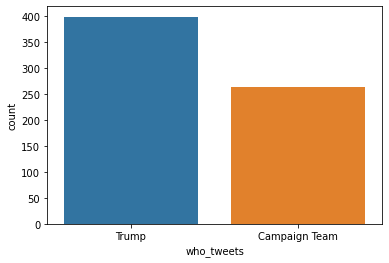

In [105]:
sns.countplot('who_tweets',data = new_df)

In [139]:
trump_df = new_df[['created_at_est','who_tweets','text']]
trump_df[trump_df.who_tweets == 'Trump'].head(10)
# Although we have no way to validate the person who tweets, does the following look like Trump tweets?

,created_at_est,who_tweets,text
0,2017-07-29 13:04:20-04:00,Trump,U.S. Stock Market up almost 20% since Election!
1,2017-07-03 16:44:27-04:00,Trump,Thank you to Shawn Steel for the nice words on @FoxNews.
2,2017-06-22 07:11:25-04:00,Trump,Great night in Iowa - special people. Thank you!
3,2017-06-24 17:23:52-04:00,Trump,MAKE AMERICA GREAT AGAIN!
4,2017-06-11 22:02:23-04:00,Trump,"My daughter, Ivanka, will be on @foxandfriends tomorrow morning. Enjoy!"
5,2017-05-12 07:53:48-04:00,Trump,The Fake Media is working overtime today!
11,2017-07-15 12:33:34-04:00,Trump,Will be at the Women's U.S. Open today!
12,2017-07-11 08:23:45-04:00,Trump,Big wins against ISIS!
13,2017-07-16 20:24:28-04:00,Trump,"Heading back to Washington, D.C. Much will be accomplished this week on trade, the military and security!"
15,2017-07-31 18:19:11-04:00,Trump,A great day at the White House!


In [142]:
trump_df[trump_df.who_tweets == 'Trump'].iloc[13].text

'...they do NOTHING for us with North Korea, just talk. We will no longer allow this to continue. China could easily solve this problem!'

In [134]:
trump_df[trump_df.who_tweets == 'Campaign Team'].head()
# Does the following look like his Campaign Team tweets?

,created_at_est,who_tweets,text
6,2017-05-22 09:13:48-04:00,Campaign Team,RT @netanyahu: Ever Strongerחזקים תמיד🇮🇱🇺🇸 htt...
7,2017-04-23 10:07:52-04:00,Campaign Team,"Thank you Lake Worth, Florida. @foxandfriends"
8,2017-05-04 07:07:35-04:00,Campaign Team,Congratulations to @foxandfriends on its unbel...
9,2017-04-14 16:41:25-04:00,Campaign Team,Weekly Address- https://t.co/tpZ7eqJLUH https:...
10,2017-07-02 09:21:42-04:00,Campaign Team,#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
